## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行歸一化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 model 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢

In [0]:
# 從網路即時下載CIFAR10⼩圖像，數據集涵蓋50,000張32x32彩⾊色訓練圖像及10,000張測試圖像，並且標註超過10個類別
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 查詢檔案維度資訊
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [0]:
# 資料前處理
def preproc_x(x):
    import numpy as np
    
    x = 2.0*(x-np.min(x)) / (np.max(x)-np.min(x)) - 1.0
    x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    from keras.utils import to_categorical

    y = to_categorical(y, num_classes)
    return y    

In [0]:
# 將資料從圖形 (RGB) 轉為向量 (Single Vector) 並進行歸一化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 將目標轉為 one-hot encoding
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
# 建立神經網路
from keras import layers, models

def build_model(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    model = models.Sequential()
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            # 第一層
            model.add(layers.Dense(n_units, activation='relu', input_shape=(input_shape)))
        else:
            # 後續幾層
            model.add(layers.Dense(n_units, activation='relu'))
    # 最後一層
    model.add(layers.Dense(output_units, activation='softmax'))
    return model
  
model = build_model(input_shape=x_train.shape[1:], output_units=10, num_neurons=[512, 256, 128, 64, 32, 16])
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 10)            

In [0]:
# 超參數設定
learning_rate = 0.001
epochs = 100
batch_size = 256

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.Adam(lr=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 11s 230us/step - loss: 1.8512 - acc: 0.3359 - val_loss: 1.6537 - val_acc: 0.4239
Epoch 2/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.5622 - acc: 0.4512 - val_loss: 1.5106 - val_acc: 0.4648
Epoch 3/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.4223 - acc: 0.4993 - val_loss: 1.4434 - val_acc: 0.4908
Epoch 4/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.3182 - acc: 0.5355 - val_loss: 1.3975 - val_acc: 0.5155
Epoch 5/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.2272 - acc: 0.5697 - val_loss: 1.3952 - val_acc: 0.5082
Epoch 6/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.1409 - acc: 0.5987 - val_loss: 1.3506 - val_acc: 0.5304
Epoch 7/100
5000

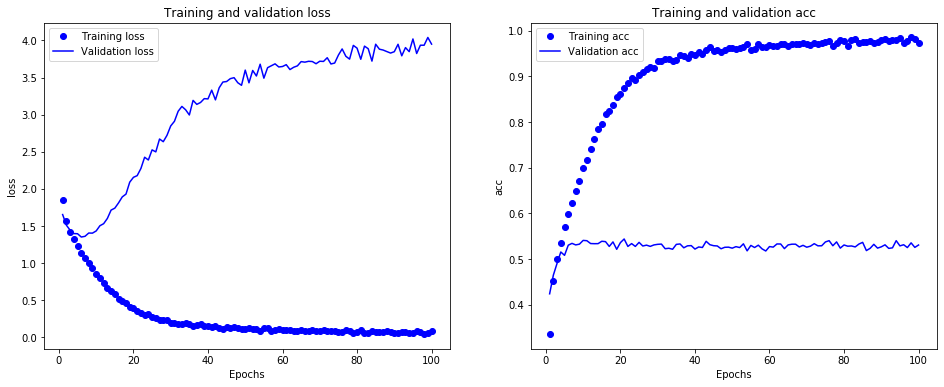

In [0]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(1, len(history.history['loss']) + 1)

rows, cols = 1, 2
figure, ax = plt.subplots(rows, cols, figsize=(16,6))
for i, score in enumerate(['loss', 'acc']):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, history.history[score], 'bo', label='Training '+score)
    plt.plot(epochs, history.history['val_'+score], 'b', label='Validation '+score)
    plt.title('Training and validation '+score)
    plt.xlabel('Epochs')
    plt.ylabel(score)
    plt.legend()